# Terceira Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##

### Exercício 1 ###
Seja um sistema dinâmico represetnado pela seguinte resposta ao impulso:\
h = [2,1,2,-1,-2]\
Pede-se:\
a) Calcular (manualmente) a saída desse sistema para um sinal de entrada x = [1,2,3,1,-1,-2].

h = [2,1,2,-1,-2]   x = [1,2,3,1,-1,-2]

y = [1,0,0,0, 0, 0] -> h -> [2, 1, 2,-1,-2] +\
&nbsp; \+&nbsp; [0,2,0,0, 0, 0] -> h -> [0, 4, 2, 4,-2,-4] +\
&nbsp; \+&nbsp; [0,0,3,0, 0, 0] -> h -> [0, 0, 6, 3, 6,-3,-6] +\
&nbsp; \+&nbsp; [0,0,0,1, 0, 0] -> h -> [0, 0, 0, 2, 1, 2,-1,-2] +\
&nbsp; \+&nbsp; [0,0,0,0,-1, 0] -> h -> [0, 0, 0, 0,-2,-1,-2, 1, 2] +\
&nbsp; \+&nbsp; [0,0,0,0, 0,-2] -> h -> [0, 0, 0, 0, 0,-4,-2,-4, 2, 4]

y = [2, 5, 10, 8, 1,-10,-11,-5, 4, 4]

b) Calcular (usando Python) a saída desse sistema para o mesmo sinal do item a.

In [1]:
import numpy as np

h = np.array([2, 1, 2, -1, -2])
x = np.array([1, 2, 3, 1, -1, -2])
print(np.convolve(x, h))

[  2   5  10   8   1 -10 -11  -5   4   4]


### Exercício 2 ###
Seja um sistema dinâmico modelado pela seguinte função de transferência:
H(z) = $$\frac{0,5769z^3 - 1,731z ^2+1,731z - 0,5769}{z^3-2,068z^2+1,415z -0,3193} (\text{fs = 10kHz})$$\
a) Verifique sua Resposta em Frequência e <u>estime</u> a amplitude e a fase dos sinais de saída do sistema quando se aplica na entrada os seguintes sinais:\
a1) s1 = cos(2\*pi\*300\*t)

In [2]:
import control as ct

fs = 10000
f = 300

w = 2*np.pi * f/fs

z = np.exp(1j*w)

Hz = (0.5769*z**3 - 1.731*z**2 + 1.731*z - 0.5769)/(z**3 - 2.068*z**2 + 1.415*z - 0.3193)
print(f"Amplitude: {np.abs(Hz)}")
print(f"Fase: {np.angle(Hz, True)}")

Amplitude: 0.0964868546848841
Fase: -174.93691908319644


a2) s2 = 3*cos(2\*pi\*1500\*t\+pi/4)

In [3]:
f = 1500
inputAmplitude = 3
inputPhase = np.pi/4

w = 2*np.pi * f/fs

z = np.exp(1j*w)

Hz = (0.5769*z**3 - 1.731*z**2 + 1.731*z - 0.5769)/(z**3 - 2.068*z**2 + 1.415*z - 0.3193)
print(f"Amplitude: {inputAmplitude*np.abs(Hz)}")
print(f"Fase: {inputPhase+np.angle(Hz, True)}")

Amplitude: 2.3537504545478933
Fase: 60.44730978551417


b) Simule o sistema e <u>confirme</u> a amplitude estimada no item (a).\
b1) s1 = cos(2\*pi\*300\*t)

In [4]:
num = [0.5769, -1.731, 1.731, -0.5769]  
den = [1, -2.068, 1.415, -0.3193]

Hz = ct.tf(num, den, 1/fs)
print(Hz)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.5769 z^3 - 1.731 z^2 + 1.731 z - 0.5769
-----------------------------------------
   z^3 - 2.068 z^2 + 1.415 z - 0.3193

dt = 0.0001



Amplitude: [0.09648685]
Fase: [-174.93691908]


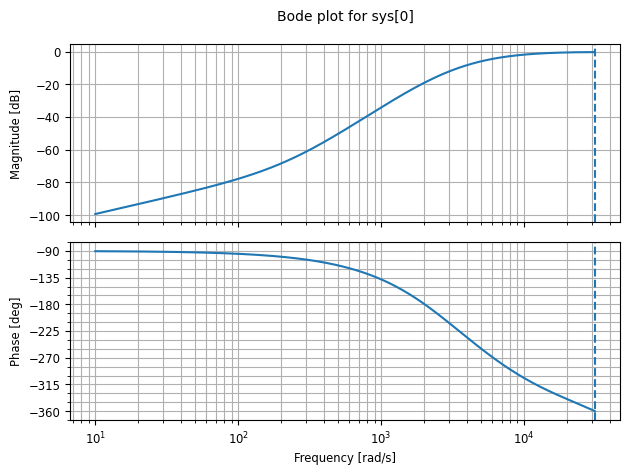

In [5]:
mag, phase, omega = ct.frequency_response(Hz,(2*np.pi*300))
ct.bode(Hz,dB=True)
print(f"Amplitude: {mag}")
print(f"Fase: {phase*180/np.pi}")

b2) s2 = 3*cos(2\*pi\*1500\*t\+pi/4)

Amplitude: [2.35383465]
Fase: [59.65670325]


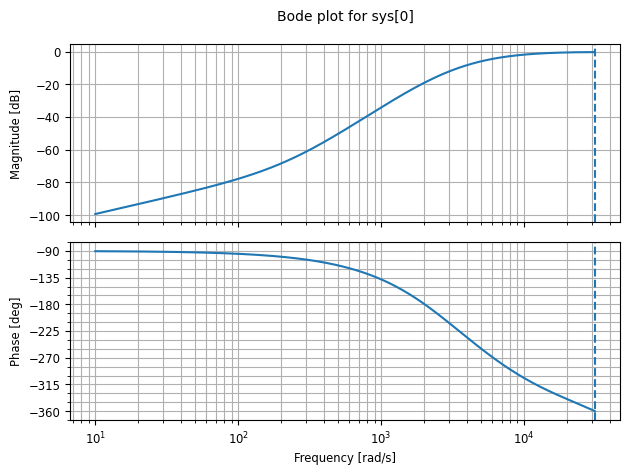

In [6]:
mag, phase, omega = ct.frequency_response(3*Hz,((2*np.pi*1500)+np.pi/4))
ct.bode(Hz,dB=True)
print(f"Amplitude: {mag}")
print(f"Fase: {phase*180/np.pi}")